# **SUPPLY DATA ANALYSIS**

- Demand-Supply Dynamics Analysis

- Time of oversupply in demand

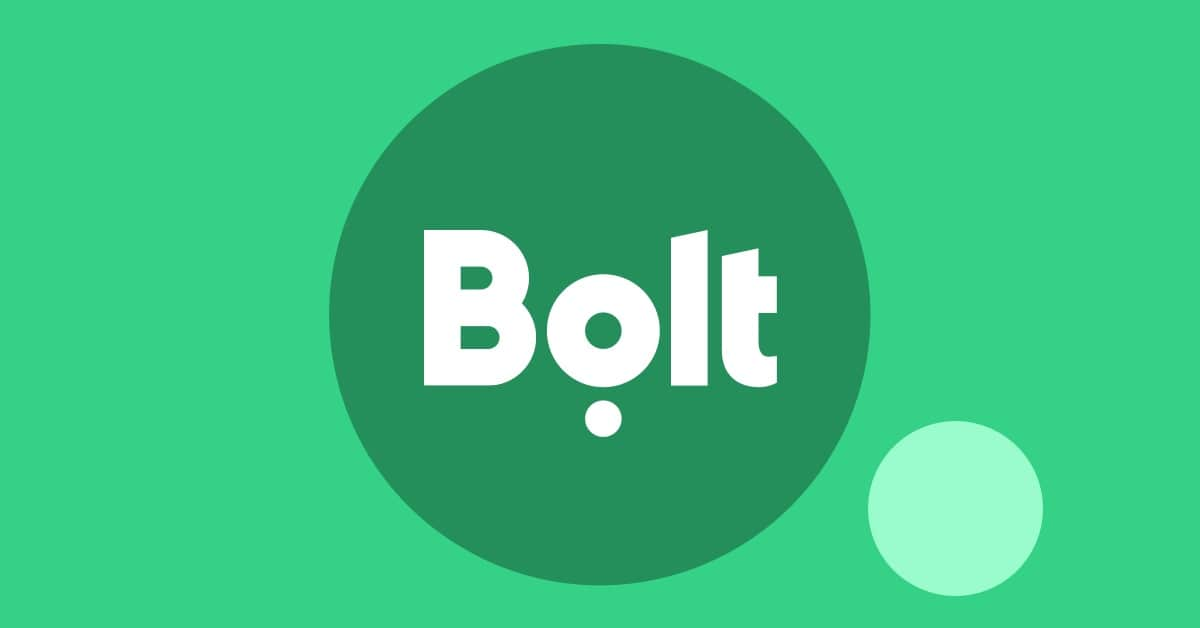

# **Table of Content** 

- SECTION A: *Importations*

  - Data Importation and Date fixings

- SECTION B: *Expository Data Analysis*

  - Data Information

  - Data Grouping by Hour

  - Bar Chart: Distribution of Drivers per Hour

  - Bar Chart: Distribution of Users per Hour

  - Pie Chart: Percentage distribution of supply hour 
  
  - Histogram: Distribution of the Rides per Hour 
  

- SECTION C: *Needed Output Data Analysis*

  - Most undersupplied 36-Hours

  - Demand-Supply Curve (24Hours)

  - Visualization of lack of supply Hours

  - Numbers of Hours for High Coverage

  - Guaranteed Drivers' Hourly Earnings

- Section D: *Conclusion and Recommendation*


# Section A

## Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt_dt
from matplotlib import collections as matcoll

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
          ##Import Drivers' Activities Data
Driver_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science Projects/DriverActivity.csv")
Driver_df.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0


In [ ]:
Driver_df.dtypes

Date                        object
Active drivers               int64
Online (h)                   int64
Has booking (h)              int64
Waiting for booking (h)      int64
Busy (h)                     int64
Hours per active driver    float64
Rides per online hour      float64
Finished Rides             float64
dtype: object

In [ ]:
                ##Import Customer overview search'  Data  
Customer_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science Projects/OverviewSearch.csv")
print(Customer_df.shape)
Customer_df.head()

(839, 4)


,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87


In [ ]:
Customer_df = Customer_df.rename(columns={'People saw 0 cars (unique)':'0_car_seen',
                            'People saw +1 cars (unique)':'+1_cars_seen',
                            'Coverage Ratio (unique)': 'Coverage_Ratio'})
Customer_df.head()

,Date,0_car_seen,+1_cars_seen,Coverage_Ratio
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87


In [ ]:
Customer_df.dtypes

Date              object
0_car_seen         int64
+1_cars_seen       int64
Coverage_Ratio     int64
dtype: object

## Date Fixing
- Creating new date columns based on:

  - Week-Based Activities
  
  - Hourly-Based Activities

In [ ]:
          #Convert date to timestamp
Driver_df['Timestamp'] = pd.to_datetime(Driver_df['Date'])
Driver_df.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,Timestamp
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,2016-12-18 23:00:00
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,2016-12-18 22:00:00
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,2016-12-18 21:00:00
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,2016-12-18 20:00:00
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,2016-12-18 19:00:00


In [ ]:
print("Min Timestamp: ", Driver_df['Timestamp'].min())
print("Max Timestamp: ", Driver_df['Timestamp'].max())

Min Timestamp:  2016-11-14 00:00:00
Max Timestamp:  2016-12-18 23:00:00


In [ ]:
                      ##Convert date to Weekly Based: Timestamp::
def fix_date(r):
  r = dt_dt.strftime(r, '%Y-%W')
  return r

Driver_df['WeekBased_Time'] = Driver_df['Timestamp'].apply(fix_date)
Driver_df.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,Timestamp,WeekBased_Time
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,2016-12-18 23:00:00,2016-50
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,2016-12-18 22:00:00,2016-50
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,2016-12-18 21:00:00,2016-50
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,2016-12-18 20:00:00,2016-50
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,2016-12-18 19:00:00,2016-50


In [ ]:
                  ##Number of distinct weeks in Data
Driver_df['WeekBased_Time'].unique()

array(['2016-50', '2016-49', '2016-48', '2016-47', '2016-46'],
      dtype=object)

In [ ]:
                      ##Convert date to Weekly Based: Timestamp::
def get_hour(r):
  r = dt_dt.strftime(r, '%H')
  return r

Driver_df['Hourbased_Time'] = Driver_df['Timestamp'].apply(get_hour)
Driver_df.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,Timestamp,WeekBased_Time,Hourbased_Time
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,2016-12-18 23:00:00,2016-50,23
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,2016-12-18 22:00:00,2016-50,22
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,2016-12-18 21:00:00,2016-50,21
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,2016-12-18 20:00:00,2016-50,20
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,2016-12-18 19:00:00,2016-50,19


In [ ]:
                  ##Number of distinct hours in Data
Driver_df['Hourbased_Time'].unique()

array(['23', '22', '21', '20', '19', '18', '17', '16', '15', '14', '13',
       '12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '02',
       '01', '00'], dtype=object)

- Fixing Date for Customer Data

In [ ]:
Customer_df.head()

,Date,0_car_seen,+1_cars_seen,Coverage_Ratio
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87


In [ ]:
          #Convert date to timestamp
Customer_df['Timestamp'] = pd.to_datetime(Customer_df['Date'])

                      ##Convert date to Weekly Based: Timestamp::
def fix_date(r):
  r = dt_dt.strftime(r, '%Y-%W')
  return r

                      ##Convert date to Weekly Based: Timestamp::
def get_hour(r):
  r = dt_dt.strftime(r, '%H')
  return r

Customer_df['WeekBased_Time'] = Customer_df['Timestamp'].apply(fix_date)
Customer_df['Hourbased_Time'] = Customer_df['Timestamp'].apply(get_hour)
Customer_df.head()

,Date,0_car_seen,+1_cars_seen,Coverage_Ratio,Timestamp,WeekBased_Time,Hourbased_Time
0,2016-12-18 23,9,32,78,2016-12-18 23:00:00,2016-50,23
1,2016-12-18 22,29,64,69,2016-12-18 22:00:00,2016-50,22
2,2016-12-18 21,5,39,89,2016-12-18 21:00:00,2016-50,21
3,2016-12-18 20,13,48,79,2016-12-18 20:00:00,2016-50,20
4,2016-12-18 19,12,77,87,2016-12-18 19:00:00,2016-50,19


# Section B : Expository Data Analysis



- Getting data Information

## Data Information

In [ ]:
                                                             #Dataset Information Table for each colum
Data_Dict=pd.DataFrame(Driver_df.dtypes)                   #datatype of each column
Data_Dict['Missing Val'] = Driver_df.isnull().sum()        #num of missing values, add to table
Data_Dict['% Missing val'] = round((Data_Dict['Missing Val'].astype(int)/Driver_df.shape[0] * 100),2)
Data_Dict['Num of Zeros'] = (Driver_df == 0).sum(0)
Data_Dict['% Num of Zeros'] = round((Data_Dict['Num of Zeros'].astype(int)/Driver_df.shape[0] * 100),2)
Data_Dict['nUnique Values']=Driver_df.nunique()            #num of unique entries, add to table
Data_Dict=Data_Dict.rename(columns={0:'Datatype'})
print('The Table below shows the Data Information of each column ')
print('Data Shape: ',Driver_df.shape)

Data_Dict

The Table below shows the Data Information of each column 
Data Shape:  (840, 12)


,Datatype,Missing Val,% Missing val,Num of Zeros,% Num of Zeros,nUnique Values
Date,object,0,0.00,0,0.00,840
Active drivers,int64,0,0.00,0,0.00,113
Online (h),int64,0,0.00,0,0.00,53
Has booking (h),int64,0,0.00,74,8.81,29
Waiting for booking (h),int64,0,0.00,0,0.00,46
Busy (h),int64,0,0.00,0,0.00,36
Hours per active driver,float64,0,0.00,0,0.00,6
Rides per online hour,float64,0,0.00,45,5.36,154
Finished Rides,float64,45,5.36,0,0.00,56
Timestamp,datetime64[ns],0,0.00,0,0.00,840


## Data Grouping by Hour 

- Grouping data by drivers' and customers' activities per hour of day



In [ ]:
            ##get dataframe for activities per hour of the day:
Hourbased_df = Driver_df.groupby(['Hourbased_Time']).sum()
Hourbased_df['Hours/active driver'] = Hourbased_df['Online (h)']/Hourbased_df['Active drivers']
Hourbased_df['Rides/online hour'] = Hourbased_df['Finished Rides']/Hourbased_df['Online (h)']
Hourbased_df  = Hourbased_df.drop(['Hours per active driver','Rides per online hour'],axis=1)
Hourbased_df = Hourbased_df.reset_index()
Hourbased_df

,Hourbased_Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Finished Rides,Hours/active driver,Rides/online hour
0,00,2141,863,270,594,554,689.0,0.403083,0.798378
1,01,1803,715,182,534,446,451.0,0.396561,0.630769
2,02,1390,555,129,427,373,324.0,0.399281,0.583784
3,03,1118,446,109,333,331,281.0,0.398927,0.630045
4,04,958,361,93,268,295,220.0,0.376827,0.609418
5,05,933,341,46,289,273,101.0,0.365488,0.296188
6,06,992,316,27,291,271,66.0,0.318548,0.208861
7,07,1285,423,92,332,313,238.0,0.329183,0.562648
8,08,1655,606,252,358,414,514.0,0.366163,0.848185
9,09,1999,787,361,424,458,706.0,0.393697,0.897078


In [ ]:
Hourbased_df.columns

Index(['Hourbased_Time', 'Active drivers', 'Online (h)', 'Has booking (h)',
       'Waiting for booking (h)', 'Busy (h)', 'Hours per active driver',
       'Rides per online hour', 'Finished Rides'],
      dtype='object')

In [ ]:
            ##get dataframe for activities per hour of the day:  
users_HoursDF = Customer_df.groupby(['Hourbased_Time']).sum() 
users_HoursDF = users_HoursDF.reset_index()
users_HoursDF['Tot_No_users'] = users_HoursDF['0_car_seen'] + users_HoursDF['+1_cars_seen'] 
users_HoursDF['Cov_Ratio/Hour'] = (users_HoursDF['+1_cars_seen']/users_HoursDF['Tot_No_users'])*100 
users_HoursDF  = users_HoursDF.drop(['Coverage_Ratio'],axis=1)
users_HoursDF

,Hourbased_Time,0_car_seen,+1_cars_seen,Tot_No_users,Cov_Ratio/Hour
0,00,305,1587,1892,83.879493
1,01,264,1058,1322,80.030257
2,02,289,773,1062,72.787194
3,03,428,644,1072,60.074627
4,04,456,448,904,49.557522
5,05,135,259,394,65.736041
6,06,147,209,356,58.707865
7,07,454,535,989,54.095046
8,08,893,1116,2009,55.550025
9,09,974,1529,2503,61.086696


## Distribution of Drivers per Hour

- Bar chart of Total of Active drivers per hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


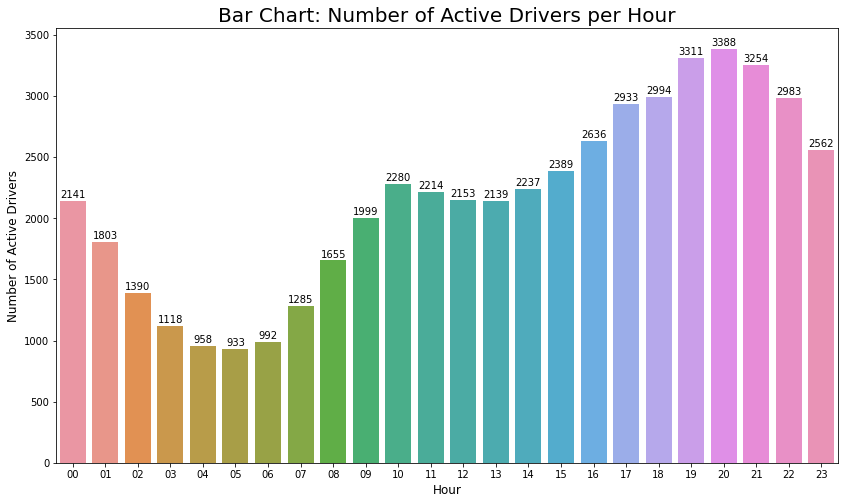

In [ ]:
plt.figure(figsize=(14,8))
ax =sns.barplot(Hourbased_df['Hourbased_Time'],Hourbased_df['Active drivers'])
x_locs,x_lables = plt.xticks()
#plt.setp(x_lables, rotation=60)     ##rotating the x_lables
plt.title("Bar Chart: Number of Active Drivers per Hour", fontsize=20)
plt.ylabel("Number of Active Drivers", fontsize=12)
plt.xlabel("Hour",fontsize=12)
#plt.grid()

                  #adding text lables...
r = ax.patches
labels = Hourbased_df['Active drivers']
for rec,label in zip(r,labels):
  height = rec.get_height()
  ax.text(rec.get_x() + rec.get_width()/2,
          height+10,
          label,
          ha='center',
          va='bottom')

- The time range where most drivers are active is:

  - Between **19:00 - 21:00 (7pm-9pm)**

- This time range is the **Supply Peak hours** 

  - With the peak time with **20:00 (8pm)**

## Distribution of Users per Hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


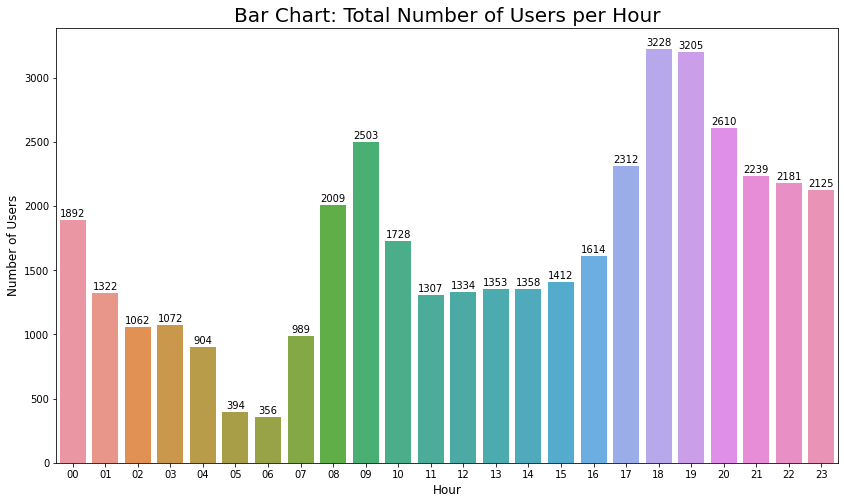

In [ ]:
plt.figure(figsize=(14,8))
ax =sns.barplot(users_HoursDF['Hourbased_Time'],users_HoursDF['Tot_No_users'])
x_locs,x_lables = plt.xticks()
#plt.setp(x_lables, rotation=60)     ##rotating the x_lables
plt.title("Bar Chart: Total Number of Users per Hour", fontsize=20)
plt.ylabel("Number of Users", fontsize=12)
plt.xlabel("Hour",fontsize=12)
#plt.grid()

                  #adding text lables...
r = ax.patches
labels = users_HoursDF['Tot_No_users']
for rec,label in zip(r,labels):
  height = rec.get_height()
  ax.text(rec.get_x() + rec.get_width()/2,
          height+10,
          label,
          ha='center',
          va='bottom')

- The time range where most users make demands :

  - **9:00(9am)**  and Between **18:00 - 19:00 (6pm-7pm)**

- This time range is the **Demand Peak hours** 

  - With the peak time with **18:00 (6pm)**

## Percentage distribution of supply hour 

- Pie Chart

- Percentage distribution of supply hour relative to overall Online hour

- Based on Number of hours Booked and Waiting Hours

In [ ]:
Hourbased_df.sum() #...

Hourbased_Time             000102030405060708091011121314151617181920212223
Active drivers                                                        51747
Online (h)                                                            19486
Has booking (h)                                                        5299
Waiting for booking (h)                                               14199
Busy (h)                                                              12826
Hours per active driver                                               310.8
Rides per online hour                                                477.78
Finished Rides                                                        11738
dtype: object

In [ ]:
##Total supply hours : Online (h)
print("Total Supply Hours: ",Hourbased_df.sum()[2])   #Online (h)
print()
print("Booked Hours:   ",Hourbased_df.sum()[3])    #Has Booking(h)
print("% Booked Hours: ",(Hourbased_df.sum()[3]/Hourbased_df.sum()[2])*100)  
print(" ")
print("Waiting Hours:   ",Hourbased_df.sum()[4])   #Waiting(h)
print("% Waiting Hours: ",(Hourbased_df.sum()[4]/Hourbased_df.sum()[2])*100)    

# print(" ")
# print("Busy Hours:   ",Hourbased_df.sum()[5])   #Busy(h)
# print("% Busy Hours: ",(Hourbased_df.sum()[5]/Hourbased_df.sum()[2])*100)    

Total Supply Hours:  19486

Booked Hours:    5299
% Booked Hours:  27.19388278764241
 
Waiting Hours:    14199
% Waiting Hours:  72.86769988709842


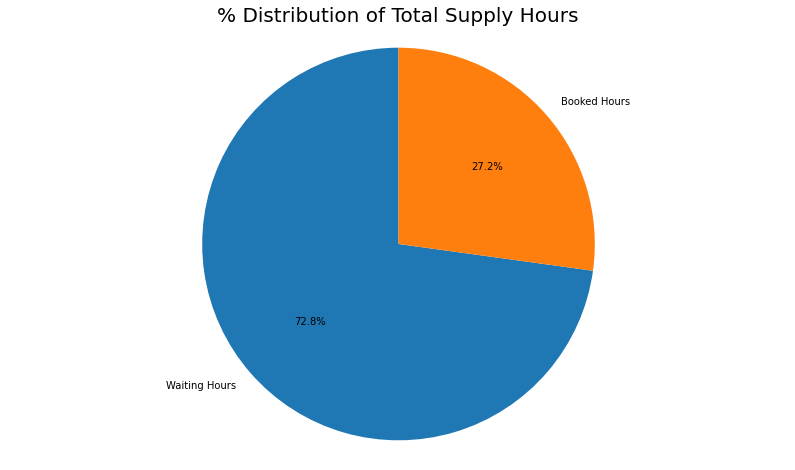

In [ ]:
plt.figure(figsize=(14,8))
sizes_=[72.86769,27.19388]
plt.pie(sizes_,
        labels=['Waiting Hours','Booked Hours'],
        startangle=90,
        shadow=False,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('% Distribution of Total Supply Hours',fontsize=20)
plt.show()

## Distribution of the Rides per Hour 

- Histogram


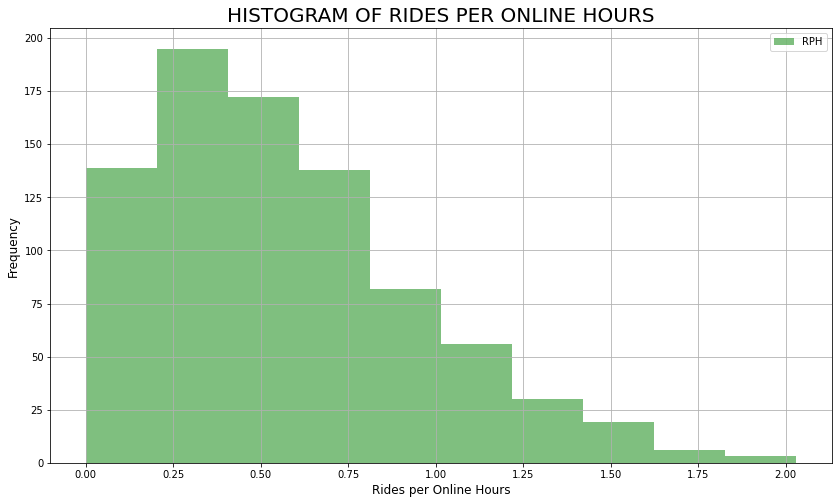

In [ ]:
#......  
plt.figure(figsize=(14,8))
Driver_df['Rides per online hour'].plot.hist(alpha=0.5,color='g') #range = (0,23)
plt.grid()
plt.legend(['RPH'])
plt.title('HISTOGRAM OF RIDES PER ONLINE HOURS',fontsize=20)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Rides per Online Hours', fontsize=12)
plt.show()

# Section C : Needed Output


## 1: Most Undersupplied 36-Hours

- Show which 36 hours in a week are most undersupplied. 

- Show/describe your decision based on sample data



**Evaluation Procedure**

- Evaluation of the undersupplied hours is based on the Supply-Demand Ratio

- Supply Indicator: Online hours

- Demand Indicator: Number of Users per hour


-  The **Supply-Demand Ratio (SDR)** based on the available data can be evaluated as:

   - **SDR** = Supply Hours per Demand = $\frac {\sum (Supply\ Hours)} {\sum (Total\ Users/Hour)} $

  - **SDR = 1** if number of available Supply Hours matches that of the total users

  - **SDR > 1** if the num of supply Hours are more than the available users: **Oversupplied**

  - **SDR < 1** if the num of supply Hours are less than the available users: **Undersupplied**



In [ ]:
Driver_df.columns

Index(['Date', 'Active drivers', 'Online (h)', 'Has booking (h)',
       'Waiting for booking (h)', 'Busy (h)', 'Hours per active driver',
       'Rides per online hour', 'Finished Rides', 'Timestamp',
       'WeekBased_Time', 'Hourbased_Time'],
      dtype='object')

In [ ]:
        ##Get Supply data based on available acyive drivers 
Supply_DF = Driver_df[['Timestamp','Active drivers','Online (h)','WeekBased_Time','Hourbased_Time']]  
Supply_DF.head()

,Timestamp,Active drivers,Online (h),WeekBased_Time,Hourbased_Time
0,2016-12-18 23:00:00,52,18,2016-50,23
1,2016-12-18 22:00:00,59,20,2016-50,22
2,2016-12-18 21:00:00,72,25,2016-50,21
3,2016-12-18 20:00:00,86,29,2016-50,20
4,2016-12-18 19:00:00,82,31,2016-50,19


In [ ]:
            ##Demand data based on total users requesting a ride:
Demand_df = Customer_df[['Timestamp','0_car_seen','+1_cars_seen']]
Demand_df['Tot_No_users'] = Demand_df['0_car_seen'] + Demand_df['+1_cars_seen'] 
Demand_dff = Demand_df[['Timestamp','Tot_No_users']]
Demand_dff.head()

,Timestamp,Tot_No_users
0,2016-12-18 23:00:00,41
1,2016-12-18 22:00:00,93
2,2016-12-18 21:00:00,44
3,2016-12-18 20:00:00,61
4,2016-12-18 19:00:00,89


In [ ]:
                 ##Combing the Demand and Supply data for "Supply-Demand" data
SupplyDemand_DF= pd.merge(Supply_DF,Demand_dff, on='Timestamp', how='inner')
SupplyDemand_DF['SupplyDemand_Ratio'] = SupplyDemand_DF['Online (h)']/SupplyDemand_DF['Tot_No_users']
SupplyDemand_DF['Supply_Status'] = np.where(SupplyDemand_DF['SupplyDemand_Ratio'] >  1, "Oversupplied",
                                   np.where(SupplyDemand_DF['SupplyDemand_Ratio'] <  1 , "Undersupplied", "Matches")) 
SupplyDemand_DF[['Timestamp','Active drivers','Tot_No_users','SupplyDemand_Ratio','Supply_Status','WeekBased_Time']]

,Timestamp,Active drivers,Tot_No_users,SupplyDemand_Ratio,Supply_Status,WeekBased_Time
0,2016-12-18 23:00:00,52,41,0.439024,Undersupplied,2016-50
1,2016-12-18 22:00:00,59,93,0.215054,Undersupplied,2016-50
2,2016-12-18 21:00:00,72,44,0.568182,Undersupplied,2016-50
3,2016-12-18 20:00:00,86,61,0.475410,Undersupplied,2016-50
4,2016-12-18 19:00:00,82,89,0.348315,Undersupplied,2016-50
...,...,...,...,...,...,...
834,2016-11-14 04:00:00,15,8,0.750000,Undersupplied,2016-46
835,2016-11-14 03:00:00,18,3,2.333333,Oversupplied,2016-46
836,2016-11-14 02:00:00,21,9,0.777778,Undersupplied,2016-46
837,2016-11-14 01:00:00,29,16,0.562500,Undersupplied,2016-46


In [ ]:
def SupplyDemand_Data(SupplyDemand_DF,week_value,date_col='Timestamp',target_col= 'SupplyDemand_Ratio'):
    Week_df = SupplyDemand_DF[SupplyDemand_DF['WeekBased_Time'] == week_value]
    weekSD_data = Week_df[[date_col, target_col]]
    weekSD_data.set_index(date_col, inplace=True)
    weekSD_data.sort_index(ascending=True, inplace=True)
    lowestHours_36 = Week_df[[date_col, target_col]].sort_values(target_col).head(36)
    return weekSD_data, lowestHours_36

def make_plot(weekSD_data,lowestHours_36,week_num,date_col='Timestamp',target_col= 'SupplyDemand_Ratio'):
    plt.figure(figsize=(30,7))
    plt.plot(weekSD_data)
    plt.scatter(lowestHours_36[date_col],lowestHours_36[target_col],color= 'r')
    plt.title(week_num +"Week Supply Demand Ratio (SDR)/Hour with Undersupplied 36-Hours(Red Points)", fontsize=20)
    plt.xlabel("Day of the week", fontsize=18)
    plt.ylabel("Supply Demand Ratio (SDR)", fontsize=18)
    plt.grid()

In [ ]:
week1_data, hours36_1 = SupplyDemand_Data(SupplyDemand_DF,week_value='2016-46',
                                          date_col='Timestamp',target_col= 'SupplyDemand_Ratio')
week1_data.head()

,SupplyDemand_Ratio
Timestamp,
2016-11-14 00:00:00,0.583333
2016-11-14 01:00:00,0.562500
2016-11-14 02:00:00,0.777778
2016-11-14 03:00:00,2.333333
2016-11-14 04:00:00,0.750000


In [ ]:
         ##36 undersupplied hours for the 1st week::
print("Most Undersupplied 36-hours in a week: ")
print()
print(hours36_1['Timestamp'].values)
#hours36_1

Most Undersupplied 36-hours in a week: 

['2016-11-15T08:00:00.000000000' '2016-11-19T07:00:00.000000000'
 '2016-11-14T07:00:00.000000000' '2016-11-18T07:00:00.000000000'
 '2016-11-14T08:00:00.000000000' '2016-11-16T08:00:00.000000000'
 '2016-11-14T09:00:00.000000000' '2016-11-17T07:00:00.000000000'
 '2016-11-15T07:00:00.000000000' '2016-11-17T18:00:00.000000000'
 '2016-11-15T09:00:00.000000000' '2016-11-18T15:00:00.000000000'
 '2016-11-18T08:00:00.000000000' '2016-11-17T17:00:00.000000000'
 '2016-11-19T08:00:00.000000000' '2016-11-18T09:00:00.000000000'
 '2016-11-16T09:00:00.000000000' '2016-11-20T08:00:00.000000000'
 '2016-11-17T15:00:00.000000000' '2016-11-15T19:00:00.000000000'
 '2016-11-17T08:00:00.000000000' '2016-11-16T07:00:00.000000000'
 '2016-11-19T09:00:00.000000000' '2016-11-15T17:00:00.000000000'
 '2016-11-17T16:00:00.000000000' '2016-11-16T18:00:00.000000000'
 '2016-11-17T09:00:00.000000000' '2016-11-18T04:00:00.000000000'
 '2016-11-16T19:00:00.000000000' '2016-11-17T23:0

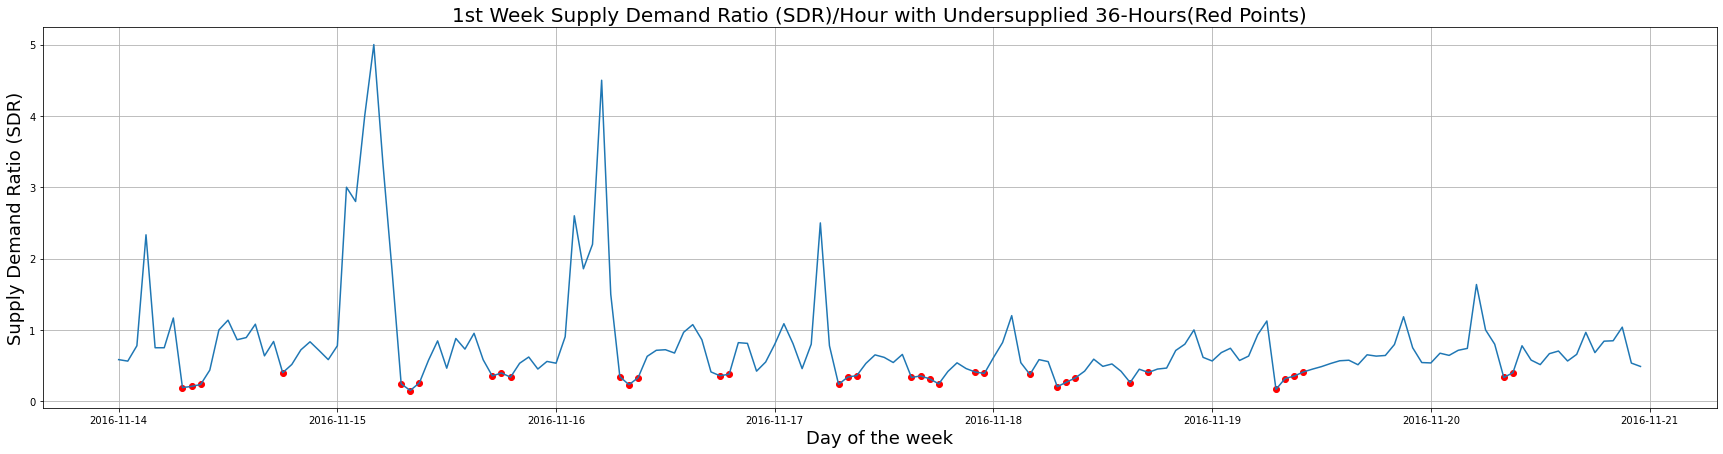

In [ ]:
      #for the 1st week
make_plot(week1_data,hours36_1,week_num='1st ',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')

In [ ]:
        ##Showing for all weeks:
SupplyDemand_DF['WeekBased_Time'].unique()

array(['2016-50', '2016-49', '2016-48', '2016-47', '2016-46'],
      dtype=object)

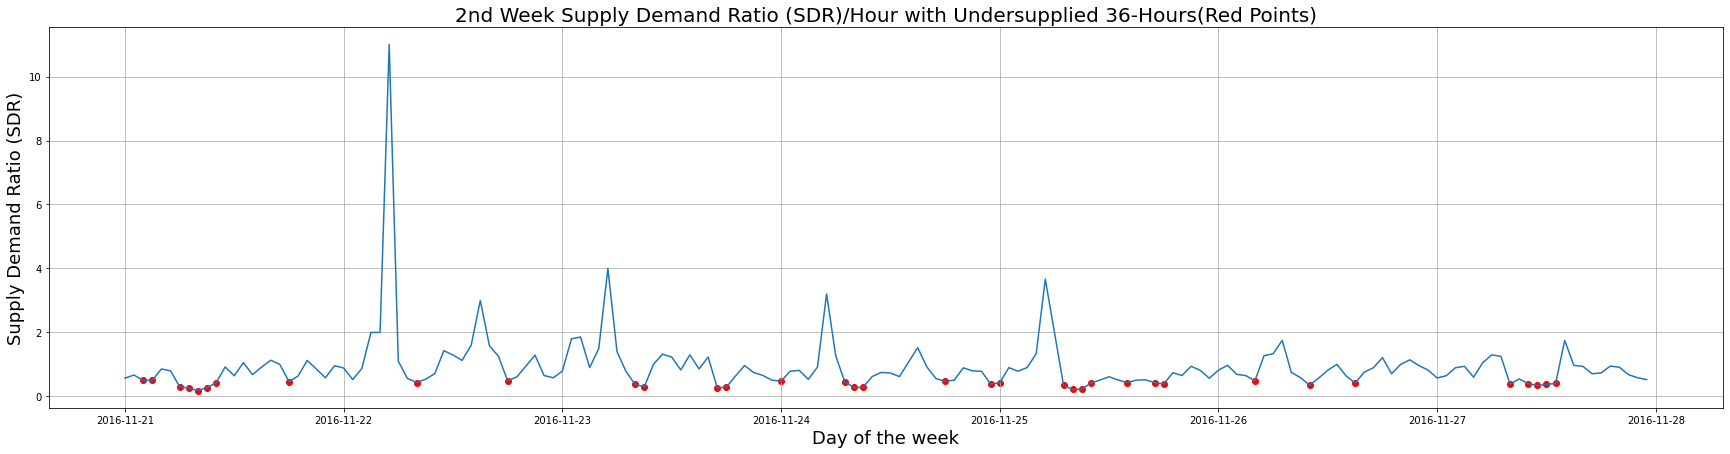

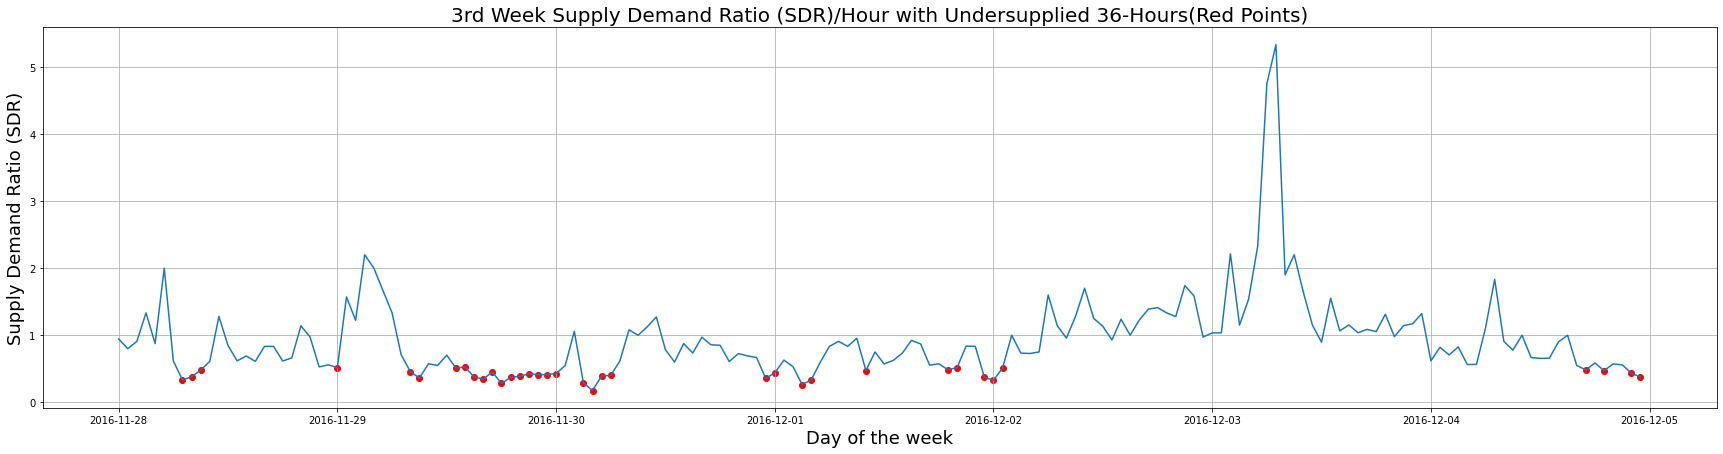

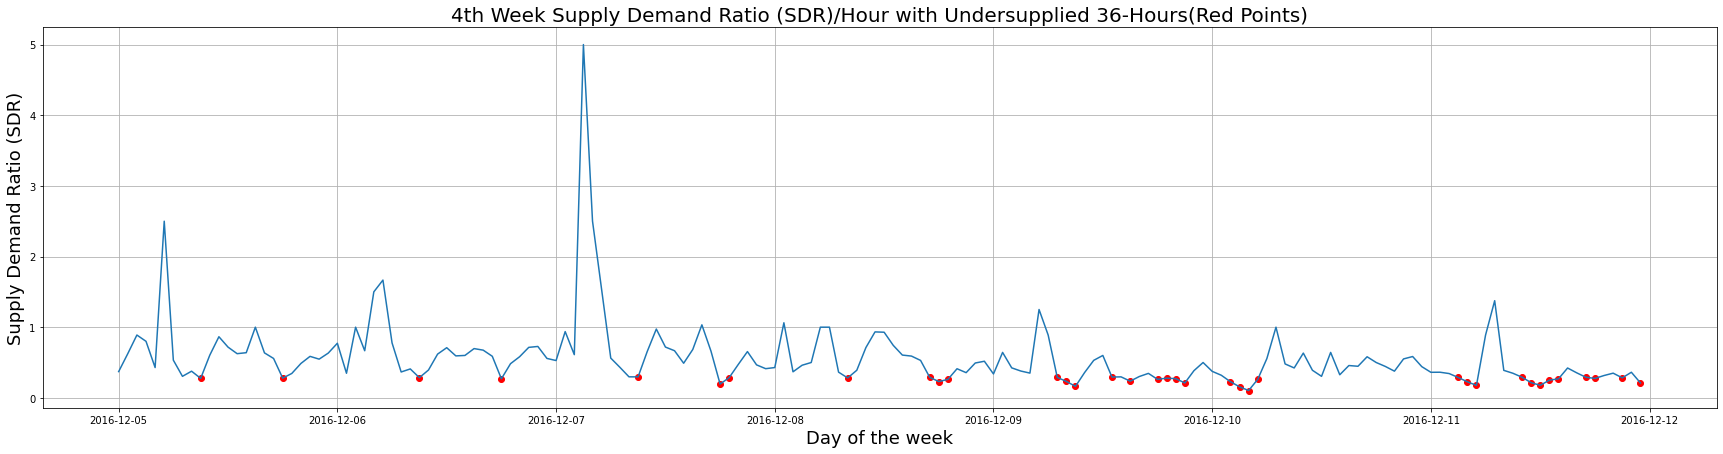

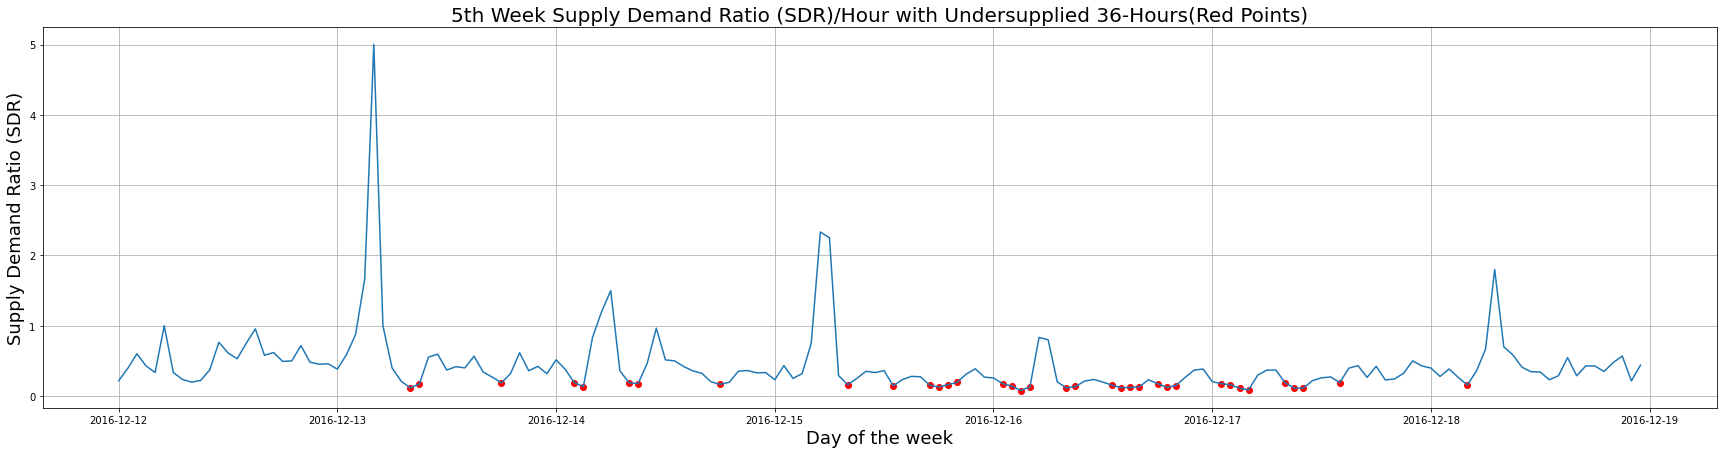

In [ ]:
            
# week1_data, hours36_1 = SupplyDemand_Data(SupplyDemand_DF,week_value='2016-46',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')
# make_plot(week1_data,hours36_1,week_num='1st ',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')
week2_data, hours36_2 = SupplyDemand_Data(SupplyDemand_DF,week_value='2016-47',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')
make_plot(week2_data,hours36_2,week_num='2nd ',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')

print("")
week3_data, hours36_3 = SupplyDemand_Data(SupplyDemand_DF,week_value='2016-48',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')
make_plot(week3_data,hours36_3,week_num='3rd ',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')


print("")
week4_data, hours36_4 = SupplyDemand_Data(SupplyDemand_DF,week_value='2016-49',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')
make_plot(week4_data,hours36_4,week_num='4th ',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')


print("")
week5_data, hours36_5 = SupplyDemand_Data(SupplyDemand_DF,week_value='2016-50',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')
make_plot(week5_data,hours36_5,week_num='5th ',date_col='Timestamp',target_col= 'SupplyDemand_Ratio')


- Visualization based on only "Online (h)"

In [ ]:
date_col, target_col = 'Timestamp', 'Online (h)'
data_slice = SampleWeek_df[[date_col, target_col]]

data_slice.set_index("Timestamp", inplace=True)
data_slice.sort_index(ascending=True, inplace=True)
data_slice.head()

lowestHours = SampleWeek_df[[date_col, target_col]].sort_values(target_col).head(40)
lowestHours

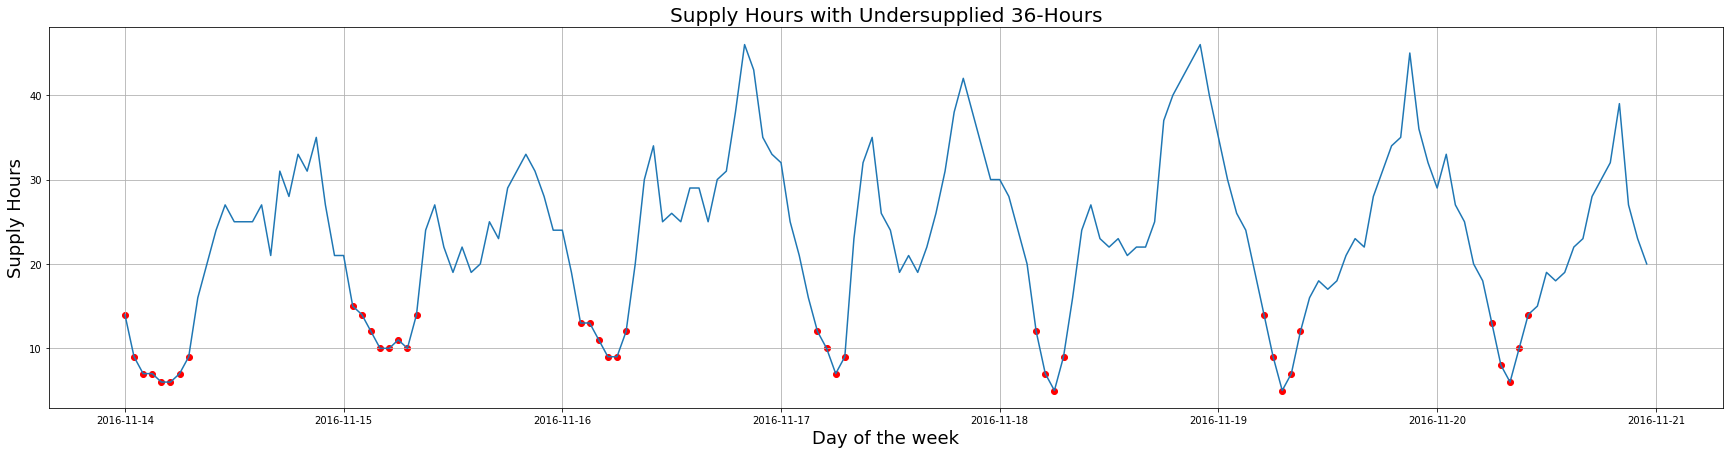

In [ ]:
plt.figure(figsize=(30,7))
plt.plot(data_slice)
plt.scatter(lowestHours[date_col],lowestHours[target_col],color= 'r')
plt.title("Supply Hours with Undersupplied 36-Hours", fontsize=20)
plt.xlabel("Day of the week", fontsize=18)
plt.ylabel("Supply Hours", fontsize=18)
plt.grid()

## 2: Demand-Supply Curve (24 Hours)

- A 24-Hour curve of Demand and Supply

- I choose the following as Demand and Supply Indicators:

   - **Supply Indictor**:   total number of *Supply Hours* 

   - **Demand Indictor**:   total number of *Users* per hour

In [ ]:
          ##Supply Indicator: 
Hourbased_df[['Online (h)']].head()

,Online (h)
0,863
1,715
2,555
3,446
4,361


In [ ]:
        ##Demand Indicator
users_HoursDF[['Tot_No_users']].head()

,Tot_No_users
0,1892
1,1322
2,1062
3,1072
4,904


In [ ]:
hours_list = list(range(0,24))
print(hours_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


- Supply-Demand Curve based on:

  - Average Supply-Hour and Users per hour

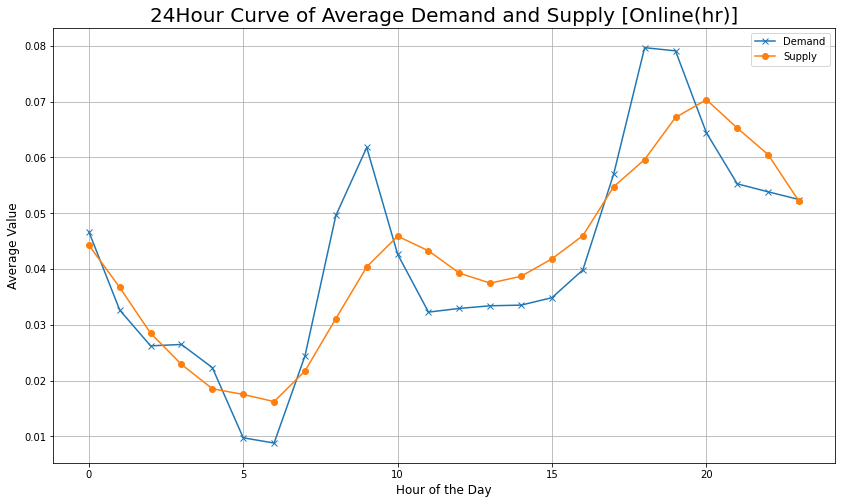

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(hours_list,users_HoursDF['Tot_No_users']/users_HoursDF['Tot_No_users'].sum(),marker='x',label='Demand',)   #color='g'
plt.plot(hours_list,Hourbased_df['Online (h)']/Hourbased_df['Online (h)'].sum(),marker='o',label='Supply')   #,color='r'
plt.title("24Hour Curve of Average Demand and Supply [Online(hr)]",fontsize=20)
plt.legend()
plt.ylabel("Average Value",fontsize=12)
plt.xlabel("Hour of the Day",fontsize=12)
plt.grid()

- Supply-Demand Curve based on:

  - Average number of Active Drivers and Users per hour

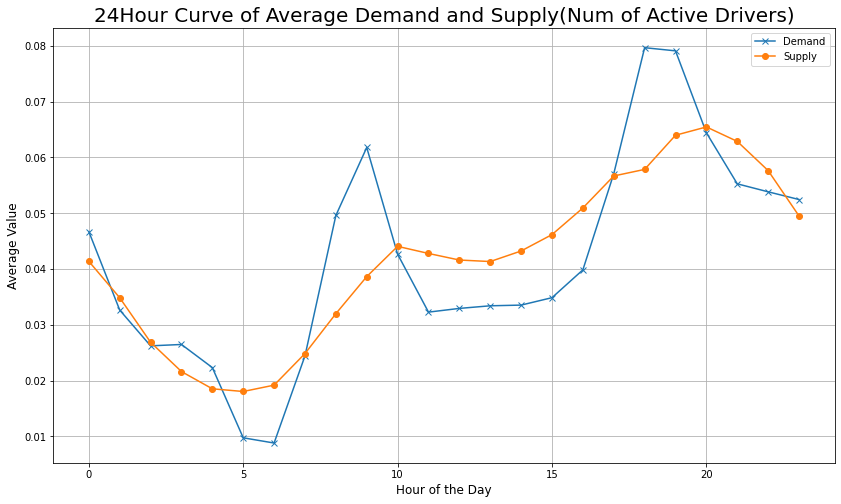

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(hours_list,users_HoursDF['Tot_No_users']/users_HoursDF['Tot_No_users'].sum(),marker='x',label='Demand',)   #color='g'
plt.plot(hours_list,Hourbased_df['Active drivers']/Hourbased_df['Active drivers'].sum(),marker='o',label='Supply')   #,color='r'
plt.title("24Hour Curve of Average Demand and Supply(Num of Active Drivers)",fontsize=20)
plt.legend()
plt.ylabel("Average Value",fontsize=12)
plt.xlabel("Hour of the Day",fontsize=12)
plt.grid()

## 3: Visualization of lack of Supply

- Visualisation of hours where we lack supply during a weekly period

- Sample Weekly period of choice: "2016-46"



In [ ]:
                #Choosing the "2016-46" as a sample 
FirstWeek_df = Driver_df[Driver_df['WeekBased_Time']=='2016-46']
FirstWeek_df.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,Timestamp,WeekBased_Time,Hourbased_Time
672,2016-11-20 23,54,20,5,16,14,0.4,0.50,10.0,2016-11-20 23:00:00,2016-46,23
673,2016-11-20 22,68,23,3,20,18,0.3,0.43,10.0,2016-11-20 22:00:00,2016-46,22
674,2016-11-20 21,77,27,3,25,22,0.4,0.37,10.0,2016-11-20 21:00:00,2016-46,21
675,2016-11-20 20,87,39,6,34,22,0.4,0.31,12.0,2016-11-20 20:00:00,2016-46,20
676,2016-11-20 19,87,32,5,27,20,0.4,0.50,16.0,2016-11-20 19:00:00,2016-46,19


In [ ]:
               ##get dataframe for activities per hour of the day:
week1_hourDF = FirstWeek_df.groupby(['Hourbased_Time']).sum()
week1_hourDF = week1_hourDF.reset_index()
week1_hourDF.head()

,Hourbased_Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,00,436,185,45,140,123,3.0,4.24,117.0
1,01,378,159,26,133,94,2.9,2.86,75.0
2,02,289,132,18,115,83,3.0,1.90,42.0
3,03,249,117,22,96,69,3.2,2.72,58.0
4,04,212,90,17,73,59,3.0,2.42,39.0


Text(0, 0.5, 'Supply Hours')

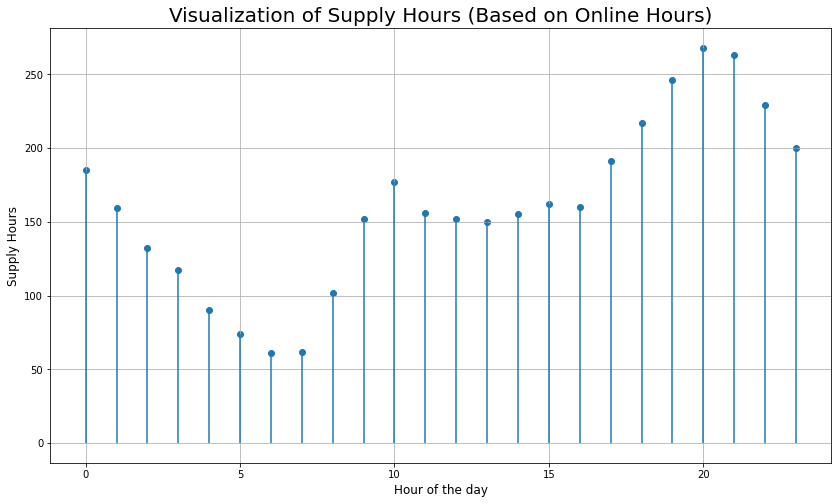

In [ ]:
x = np.arange(0,24)
y = week1_hourDF['Online (h)'].to_list()
lines = []
for i in range(len(x)):
    pair=[(x[i],0), (x[i], y[i])]
    lines.append(pair)


linecoll = matcoll.LineCollection(lines)
fig, ax = plt.subplots(figsize=(14,8))
ax.add_collection(linecoll)
plt.scatter(x,y)
plt.grid()
plt.title("Visualization of Supply Hours (Based on Online Hours)",fontsize=20)
plt.xlabel("Hour of the day",fontsize=12)
plt.ylabel("Supply Hours",fontsize=12)

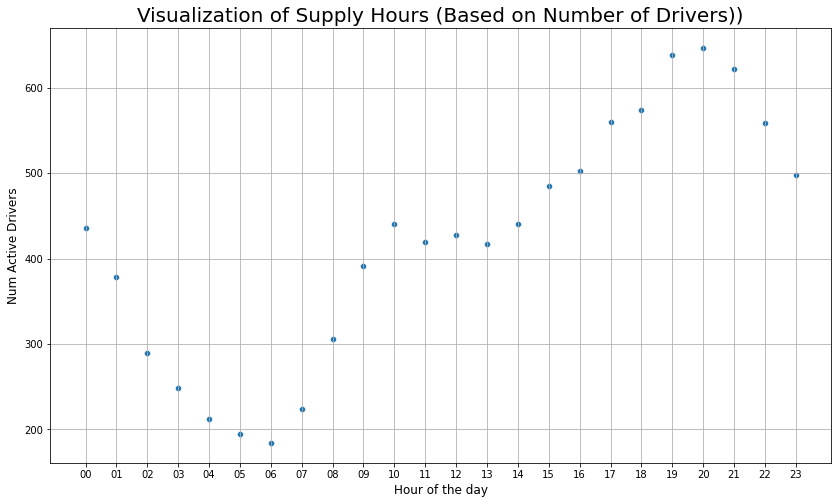

In [ ]:
                  ##Correlation between reviews and rating ..
plt.figure(figsize=(14,8))
sns.scatterplot(x='Hourbased_Time',y='Active drivers',data= week1_hourDF)
plt.title("Visualization of Supply Hours (Based on Number of Drivers))",fontsize=20)
plt.xlabel("Hour of the day",fontsize=12)
plt.ylabel("Num Active Drivers",fontsize=12)
plt.grid()

- Chart showing the Supply Hours within a 1-week dataset.

- There is a steady decline of supply hours from **00:00 - 6:00 (12.am-6am) **

- and a steady increase from **6:00- 10:00(6am- 10am)**

- The overall timeframe with the lowest supply hours is  **4:00- 7:00 (4am-7am) **

- with **6am** being the time with lowest supply hour 



In [ ]:
# x = np.arange(0,24)
# y = week1_hourDF['Active drivers'].to_list()
# lines = []
# for i in range(len(x)):
#     pair=[(x[i],0), (x[i], y[i])]
#     lines.append(pair)


# linecoll = matcoll.LineCollection(lines)
# fig, ax = plt.subplots(figsize=(14,8))
# ax.add_collection(linecoll)
# plt.scatter(x,y)
# plt.grid()
# plt.title("Visualization of Supply Hours (Based on Number of Drivers))",fontsize=20)
# plt.xlabel("Hour of the day",fontsize=12)
# plt.ylabel("Num Active Drivers",fontsize=12)
# plt.xticks(x)

# # colours = ['Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue','Blue',
# #            'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue','Blue']
# # plt.scatter(x,y,c=colours)

## 4: Number of Hours for High Coverage

- Estimate number of hours needed to ensure we have a high Coverage Ratio during most
peak hours.





- **Solution**

  - First: The peak hours of demand based on total num of users are; **9am**, **6pm-7pm**  

  - To increase coverage at peak hours, we need to increase number of users that found +1 cars;

  - Provide drivers for "people who saw 0 car" 
 
  - Assuming a mapping of **1-user to each driver**; then we can estimate hours needed for high coverage as;

  -  $ Hrs/drivers =  \frac{Online\ Hours}{Num\ Active\ Drivers}$  

  - $ Estimated\ Hours =  (Hrs/drivers) \times (Num\ Drivers + people\ who\ saw\ 0\ car )$      

In [ ]:
Driver_df.head(1)

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,Timestamp,WeekBased_Time,Hourbased_Time
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,2016-12-18 23:00:00,2016-50,23


In [ ]:
                 #Combing the Demand and Supply data for "Supply-Demand" data
Hourbased_MergedDF= pd.merge(users_HoursDF,Hourbased_df, on='Hourbased_Time', how='inner')
Hourbased_MergedDF.head()

,Hourbased_Time,0_car_seen,+1_cars_seen,Tot_No_users,Cov_Ratio/Hour,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Finished Rides,Hours/active driver,Rides/online hour
0,00,305,1587,1892,83.879493,2141,863,270,594,554,689.0,0.403083,0.798378
1,01,264,1058,1322,80.030257,1803,715,182,534,446,451.0,0.396561,0.630769
2,02,289,773,1062,72.787194,1390,555,129,427,373,324.0,0.399281,0.583784
3,03,428,644,1072,60.074627,1118,446,109,333,331,281.0,0.398927,0.630045
4,04,456,448,904,49.557522,958,361,93,268,295,220.0,0.376827,0.609418


In [ ]:
Hourbased_MergedDF['Increased Num of Drivers'] = Hourbased_MergedDF['Active drivers'] + Hourbased_MergedDF['0_car_seen']
Hourbased_MergedDF['Hrs (for High Coverage)'] = Hourbased_MergedDF['Increased Num of Drivers'] * Hourbased_MergedDF['Hours/active driver']
           ##Peak Hours Data
Hourbased_MergedDF.iloc[[9,18,19]][['Hourbased_Time','0_car_seen','Tot_No_users','Cov_Ratio/Hour','Active drivers','Hrs (for High Coverage)']]

,Hourbased_Time,0_car_seen,Tot_No_users,Cov_Ratio/Hour,Active drivers,Hrs (for High Coverage)
9,09,974,2503,61.086696,1999,1170.460730
18,18,928,3228,71.251549,2994,1522.165665
19,19,787,3205,75.444618,3311,1620.139535


## 5(i) Guaranteed Drivers' hourly earnings

- Calculate levels of guaranteed hourly earnings we can offer to drivers 

- during 36 weekly hours with highest demand without losing money 

-  How much extra hours we want to get to capture missed demand

- **(A) :** Guaranted Hourly earning for 36 weekly hours (with Hightest Demand) 

  - The 1st task is to find the 36 hours with highest demand for a given week

  - Demand indicator : **Total number of users requesting rides per hour**

In [ ]:
##

In [ ]:
                ##Get Supply data based on available acyive drivers 
SupplyDF_2 = Driver_df[['Timestamp','Active drivers','Online (h)','Hours per active driver','Rides per online hour',
                       'Finished Rides','WeekBased_Time','Hourbased_Time']]  

                ##Demand data based on total users requesting a ride:
DemandDF_2 = Customer_df[['Timestamp','0_car_seen','+1_cars_seen','Coverage_Ratio']]
DemandDF_2['Tot_No_users'] = DemandDF_2['0_car_seen'] + DemandDF_2['+1_cars_seen'] 
DemandDF_2 = DemandDF_2[['Timestamp','0_car_seen','+1_cars_seen','Tot_No_users','Coverage_Ratio']]

                 #Combing the Demand and Supply data for "Supply-Demand" data
SupplyDemand_DF2= pd.merge(SupplyDF_2,DemandDF_2, on='Timestamp', how='inner')
SupplyDemand_DF2.head(3)

,Timestamp,Active drivers,Online (h),Hours per active driver,Rides per online hour,Finished Rides,WeekBased_Time,Hourbased_Time,0_car_seen,+1_cars_seen,Tot_No_users,Coverage_Ratio
0,2016-12-18 23:00:00,52,18,0.3,0.67,12.0,2016-50,23,9,32,41,78
1,2016-12-18 22:00:00,59,20,0.3,1.40,28.0,2016-50,22,29,64,93,69
2,2016-12-18 21:00:00,72,25,0.3,0.64,16.0,2016-50,21,5,39,44,89


In [ ]:
WeekDF_1 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-50']
weekSD_data2 = WeekDF_1[['Timestamp', 'Tot_No_users']]
weekSD_data2.set_index('Timestamp', inplace=True)
weekSD_data2.sort_index(ascending=True, inplace=True)
weekSD_data2.head()

,Tot_No_users
Timestamp,
2016-12-12 00:00:00,60
2016-12-12 01:00:00,28
2016-12-12 02:00:00,10
2016-12-12 03:00:00,7
2016-12-12 04:00:00,6


In [ ]:
highestDemand_Hrs36 = WeekDF_1[['Timestamp', 'Tot_No_users']].sort_values('Tot_No_users',ascending=False).head(36)
highestDemand_Hrs36.head()
#return weekSD_data, lowestHours_36

,Timestamp,Tot_No_users
52,2016-12-16 19:00:00,270
51,2016-12-16 20:00:00,259
53,2016-12-16 18:00:00,231
77,2016-12-15 18:00:00,196
50,2016-12-16 21:00:00,192


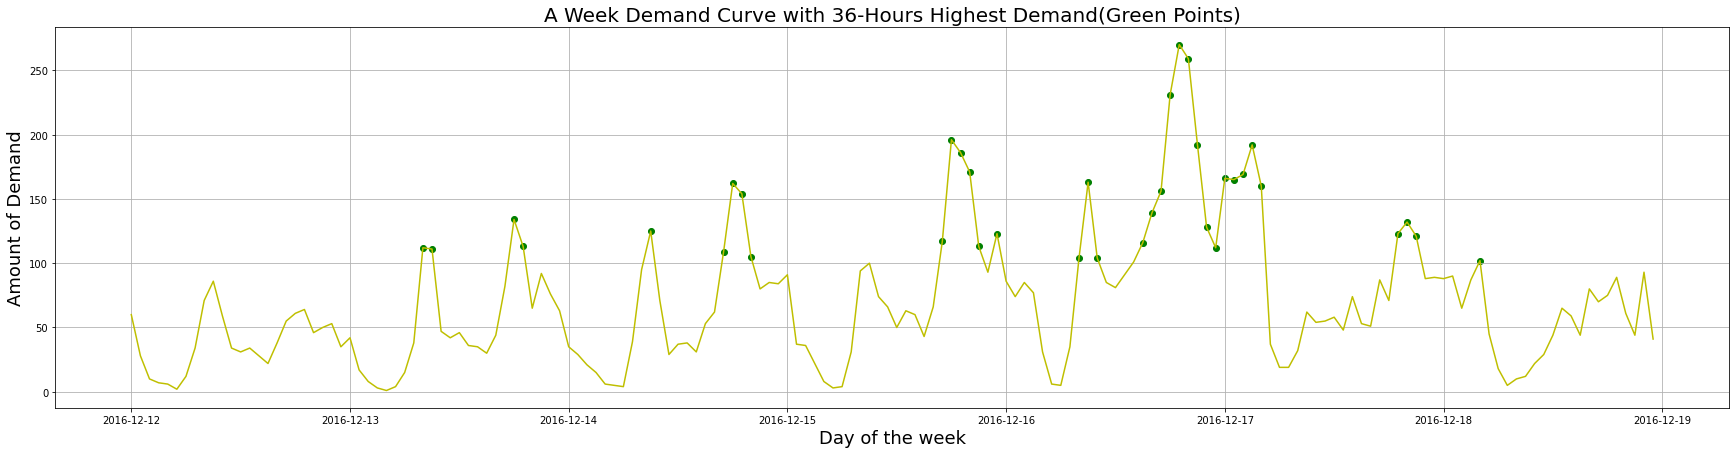

In [ ]:
plt.figure(figsize=(30,7))
plt.plot(weekSD_data2,color='y')
plt.scatter(highestDemand_Hrs36['Timestamp'],highestDemand_Hrs36['Tot_No_users'],color= 'g')
plt.title("A Week Demand Curve with 36-Hours Highest Demand(Green Points)", fontsize=20)
plt.xlabel("Day of the week", fontsize=18)
plt.ylabel("Amount of Demand", fontsize=18)
plt.grid()

-  With Finished Rides having an average value of €10 (80% goes to driver) 

- Hourly Earning (€) at each high demand hour is evaluated such that:

  - Hourly Earning (€) = Rides/Hour(**RPh**) X 80% value

  - **Hourly Earning (€)  = RPH X 8€**

In [ ]:
WeekDF_1 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-46']
highestDemandDF_1 = WeekDF_1.sort_values('Tot_No_users', ascending=False).head(36)
highestDemandDF_1['Earning/Hr(€) wk1'] = highestDemandDF_1['Rides per online hour']*8  #8€/Ride 
highestDemandDF_1[['Timestamp','Online (h)','Rides per online hour',
                  'Tot_No_users','Earning/Hr(€) wk1']].head()

,Timestamp,Online (h),Rides per online hour,Tot_No_users,Earning/Hr(€) wk1
748,2016-11-17 18:00:00,31,1.00,127,8.00
771,2016-11-16 19:00:00,38,1.05,100,8.40
805,2016-11-15 09:00:00,24,1.21,93,9.68
806,2016-11-15 08:00:00,14,1.07,93,8.56
795,2016-11-15 19:00:00,31,1.00,92,8.00


In [ ]:

highestDemandDF_2 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-47'].sort_values('Tot_No_users',ascending=False).head(36)
highestDemandDF_2['Earning/Hr(€) wk2'] = highestDemandDF_2['Rides per online hour']*8  #8€/Ride 

highestDemandDF_3 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-48'].sort_values('Tot_No_users',ascending=False).head(36)
highestDemandDF_3['Earning/Hr(€) wk3'] = highestDemandDF_3['Rides per online hour']*8  #8€/Ride 

highestDemandDF_4 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-49'].sort_values('Tot_No_users',ascending=False).head(36)
highestDemandDF_4['Earning/Hr(€) wk4'] = highestDemandDF_4['Rides per online hour']*8  #8€/Ride 

highestDemandDF_5 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-50'].sort_values('Tot_No_users',ascending=False).head(36)
highestDemandDF_5['Earning/Hr(€) wk5'] = highestDemandDF_5['Rides per online hour']*8  #8€/Ride 


In [ ]:
                              #DataFrame showing earning per hour across all available week
cols_1 = ['Earning/Hr(wk1)','Earning/Hr(wk2)','Earning/Hr(wk3)','Earning/Hr(wk4)','Earning/Hr(wk5)']   
earning_DF = pd.DataFrame(list(zip(highestDemandDF_1['Earning/Hr(€) wk1'], highestDemandDF_2['Earning/Hr(€) wk2'],
                                   highestDemandDF_3['Earning/Hr(€) wk3'], highestDemandDF_4['Earning/Hr(€) wk4'],
                                   highestDemandDF_5['Earning/Hr(€) wk5'])),
                          columns= cols_1)

earning_DF

,Earning/Hr(wk1),Earning/Hr(wk2),Earning/Hr(wk3),Earning/Hr(wk4),Earning/Hr(wk5)
0,8.00,4.24,7.04,8.40,8.72
1,8.40,8.56,6.32,12.80,13.04
2,9.68,9.84,7.04,10.56,9.20
3,8.56,7.04,7.20,12.00,13.76
4,8.00,8.24,5.44,13.44,6.40
5,8.56,6.48,9.60,8.40,14.08
6,3.60,7.44,6.88,9.20,11.76
7,7.52,6.88,4.56,8.64,12.16
8,7.52,5.68,8.00,9.44,12.16
9,5.44,10.56,7.52,7.12,11.04


In [ ]:
def make_boxplot(DF,y_label,x_label,title,size=(12, 8)):
    plt.figure(figsize= size)
    sns.boxplot(x="variable", y="value",data=pd.melt(DF))
    plt.ylabel(y_label,fontsize = 14)
    plt.xlabel(x_label,fontsize = 14)
    plt.title(title,fontsize = 14)
    plt.grid(True)    

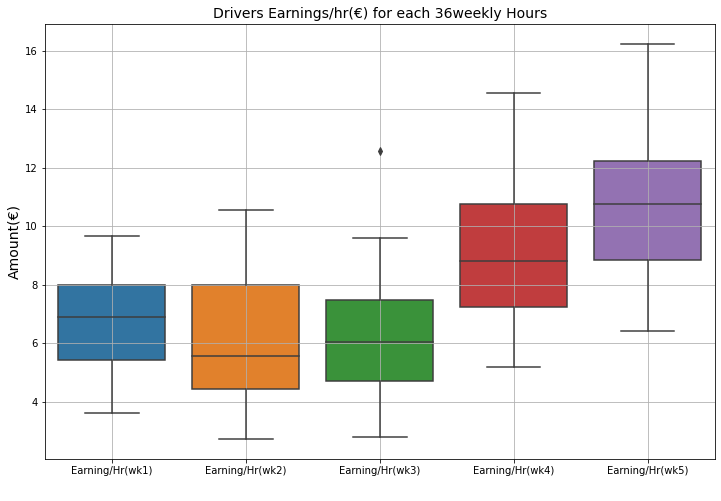

In [ ]:
make_boxplot(earning_DF,"Amount(€)",' ','Drivers Earnings/hr(€) for each 36weekly Hours')

In [ ]:
      ##Average earning per hour across all available weeks 
earning_DF.mean()  

Earning/Hr(wk1)     6.717778
Earning/Hr(wk2)     6.080000
Earning/Hr(wk3)     6.128889
Earning/Hr(wk4)     9.084444
Earning/Hr(wk5)    10.704444
dtype: float64

## 5(ii) Extra hours to capture Missed Demand

- how much extra hours we want to get
to capture missed demand?

- Solution

    - First find the Avg hours/trip during the 36 hours highest demand
  
    - Hrs per Demand =  **Num of Supply Hours/Total Num of users**
  
    - Extra Hours(for missed rides) = **Hrs per Demand X Num of missed trips**

    - Where the number of missed demand = **Number "people saw 0 cars"**

In [ ]:
Driver_df.head()  ##

In [ ]:
SupplyDemand_DF2.head(3)

,Timestamp,Active drivers,Online (h),Hours per active driver,Rides per online hour,Finished Rides,WeekBased_Time,Hourbased_Time,0_car_seen,+1_cars_seen,Tot_No_users,Coverage_Ratio
0,2016-12-18 23:00:00,52,18,0.3,0.67,12.0,2016-50,23,9,32,41,78
1,2016-12-18 22:00:00,59,20,0.3,1.40,28.0,2016-50,22,29,64,93,69
2,2016-12-18 21:00:00,72,25,0.3,0.64,16.0,2016-50,21,5,39,44,89


In [ ]:
        ##A single week sample of number of extra hours needed
WeekDF_1 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-46']
HighDemand_Hrs36 = WeekDF_1[['Timestamp','Online (h)','0_car_seen','Tot_No_users']]
HighDemand_Hrs36 = HighDemand_Hrs36.sort_values('Tot_No_users',ascending=False).head(36)
HighDemand_Hrs36['Hours/Demand'] = HighDemand_Hrs36['Online (h)']/HighDemand_Hrs36['Tot_No_users']
HighDemand_Hrs36['ExtraHours_wk1'] = HighDemand_Hrs36['Hours/Demand']*HighDemand_Hrs36['0_car_seen']
HighDemand_Hrs36.head()

,Timestamp,Online (h),0_car_seen,Tot_No_users,Hours/Demand,ExtraHours_wk1
748,2016-11-17 18:00:00,31,34,127,0.244094,8.299213
771,2016-11-16 19:00:00,38,14,100,0.380000,5.320000
805,2016-11-15 09:00:00,24,41,93,0.258065,10.580645
806,2016-11-15 08:00:00,14,58,93,0.150538,8.731183
795,2016-11-15 19:00:00,31,17,92,0.336957,5.728261


In [ ]:

HighDemandDF_2 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-47'].sort_values('Tot_No_users',ascending=False).head(36)
HighDemandDF_2['Hours/Demand'] = HighDemandDF_2['Online (h)']/HighDemandDF_2['Tot_No_users']  #Hour/Demand
HighDemandDF_2['ExtraHours_wk2'] =  HighDemandDF_2['Hours/Demand']*HighDemandDF_2['0_car_seen']

HighDemandDF_3 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-48'].sort_values('Tot_No_users',ascending=False).head(36)
HighDemandDF_3['Hours/Demand'] = HighDemandDF_3['Online (h)']/HighDemandDF_3['Tot_No_users']  
HighDemandDF_3['ExtraHours_wk3'] = HighDemandDF_3['Hours/Demand']*HighDemandDF_3['0_car_seen']

HighDemandDF_4 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-49'].sort_values('Tot_No_users',ascending=False).head(36)
HighDemandDF_4['Hours/Demand'] = HighDemandDF_4['Online (h)']/HighDemandDF_4['Tot_No_users']  
HighDemandDF_4['ExtraHours_wk4'] = HighDemandDF_4['Hours/Demand']*HighDemandDF_4['0_car_seen']

HighDemandDF_5 = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-50'].sort_values('Tot_No_users',ascending=False).head(36)
HighDemandDF_5['Hours/Demand'] = HighDemandDF_5['Online (h)']/HighDemandDF_5['Tot_No_users']  
HighDemandDF_5['ExtraHours_wk5'] =  HighDemandDF_5['Hours/Demand']*HighDemandDF_5['0_car_seen']

In [ ]:
                              ## DataFrame showing Extar Hours needed across all available week for teh 36Hpurs of Demand
cols_2 = ['ExtraHours_wk1','ExtraHours_wk2','ExtraHours_wk3','ExtraHours_wk4','ExtraHours_wk5']   
ExtraHours_DF = pd.DataFrame(list(zip(HighDemand_Hrs36['ExtraHours_wk1'], HighDemandDF_2['ExtraHours_wk2'],
                                     HighDemandDF_3['ExtraHours_wk3'], HighDemandDF_4['ExtraHours_wk4'],
                                     HighDemandDF_5['ExtraHours_wk5'])),columns= cols_2)

ExtraHours_DF

,ExtraHours_wk1,ExtraHours_wk2,ExtraHours_wk3,ExtraHours_wk4,ExtraHours_wk5
0,8.299213,2.168675,12.363636,19.080460,15.766667
1,5.320000,6.857143,10.008621,13.493976,12.764479
2,10.580645,11.078261,2.058824,12.026144,11.004329
3,8.731183,13.171171,5.515152,11.671429,15.816327
4,5.728261,10.709091,3.877551,10.103704,10.156250
5,7.912088,8.555556,2.886598,7.511278,11.484375
6,6.263736,10.125000,11.907216,13.357143,16.935484
7,11.865169,5.670330,2.648649,10.146341,12.736842
8,5.701149,5.561798,8.432432,8.639344,10.704142
9,4.651163,8.204545,7.791667,12.909836,10.445783


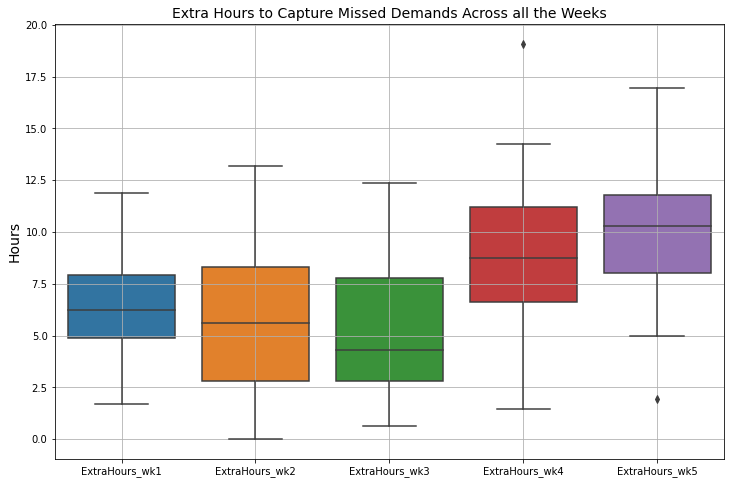

In [ ]:
def make_boxplot(DF,y_label,x_label,title,size=(12, 8)):
    plt.figure(figsize= size)
    sns.boxplot(x="variable", y="value",data=pd.melt(DF))
    plt.ylabel(y_label,fontsize = 14)
    plt.xlabel(x_label,fontsize = 14)
    plt.title(title,fontsize = 14)
    plt.grid(True)    

make_boxplot(ExtraHours_DF,"Hours",' ','Extra Hours to Capture Missed Demands Across all the Weeks')

In [ ]:
           ##Average Extra Hour needed across all available weeks 
ExtraHours_DF.mean()  

ExtraHours_wk1     6.445998
ExtraHours_wk2     5.666214
ExtraHours_wk3     5.094266
ExtraHours_wk4     8.708663
ExtraHours_wk5    10.236156
dtype: float64

## 5(iii) With Increased Supply

- Assume the same level of demand with increased supply,

-  base it on RPH over 3 hour periods, but with increased supply.

- **Solution**

    - Convert Data based on 3-Hours period information for each week

    - Select the 36-Hours timeframe with the highest demand  

    - Increase supply Hour by 7 Hours during the 36Hour peak demand
    
    - Then find the RPH over 3 hours period during the 36 hours peak demand 
   
  - Then Estimate the guranteed earning with this increase supply
    

In [ ]:
              ##SupplyDemand information for first week
##sample_DF = SupplyDemand_DF2.copy()
sample_DF = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == '2016-46']
sample_DF.sort_index(ascending=False, inplace=True)
sample_DF.head()

,Timestamp,Active drivers,Online (h),Hours per active driver,Rides per online hour,Finished Rides,WeekBased_Time,Hourbased_Time,0_car_seen,+1_cars_seen,Tot_No_users,Coverage_Ratio
838,2016-11-14 00:00:00,38,14,0.4,0.43,6.0,2016-46,00,9,15,24,63
837,2016-11-14 01:00:00,29,9,0.3,0.22,2.0,2016-46,01,8,8,16,50
836,2016-11-14 02:00:00,21,7,0.3,0.14,1.0,2016-46,02,3,6,9,67
835,2016-11-14 03:00:00,18,7,0.4,0.00,NaN,2016-46,03,1,2,3,67
834,2016-11-14 04:00:00,15,6,0.4,0.00,NaN,2016-46,04,4,4,8,50


In [ ]:
          ##Find data over 3 hours period
sampleDF = sample_DF.rolling(window='3h',min_periods=3,on='Timestamp').sum()   
print(sampleDF.shape)
sampleDF.head(10)

(168, 10)


,Timestamp,Active drivers,Online (h),Hours per active driver,Rides per online hour,Finished Rides,0_car_seen,+1_cars_seen,Tot_No_users,Coverage_Ratio
838,2016-11-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,2016-11-14 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,2016-11-14 02:00:00,88.0,30.0,1.0,0.79,9.0,20.0,29.0,49.0,180.0
835,2016-11-14 03:00:00,68.0,23.0,1.0,0.36,NaN,12.0,16.0,28.0,184.0
834,2016-11-14 04:00:00,54.0,20.0,1.1,0.14,NaN,8.0,12.0,20.0,184.0
833,2016-11-14 05:00:00,49.0,19.0,1.2,0.50,NaN,9.0,10.0,19.0,167.0
832,2016-11-14 06:00:00,54.0,19.0,1.1,0.64,NaN,9.0,13.0,22.0,183.0
831,2016-11-14 07:00:00,76.0,22.0,0.9,1.75,14.0,27.0,34.0,61.0,186.0
830,2016-11-14 08:00:00,107.0,32.0,0.8,2.44,30.0,61.0,69.0,130.0,187.0
829,2016-11-14 09:00:00,139.0,45.0,0.9,3.25,48.0,103.0,106.0,209.0,153.0


In [ ]:
DF_over3Hrs = sampleDF.iloc[list(range(2,168,3))]       #Selection over 3Hours period(for the 168 hours in a week)  
print(DF_over3Hrs.shape)                                #We have 56 distinct "3-hours period"
DF_over3Hrs[['Timestamp','Active drivers','Online (h)','Finished Rides','Tot_No_users']].head(5)

(56, 10)


,Timestamp,Active drivers,Online (h),Finished Rides,Tot_No_users
836,2016-11-14 02:00:00,88.0,30.0,9.0,49.0
833,2016-11-14 05:00:00,49.0,19.0,NaN,19.0
830,2016-11-14 08:00:00,107.0,32.0,30.0,130.0
827,2016-11-14 11:00:00,189.0,71.0,40.0,167.0
824,2016-11-14 14:00:00,208.0,75.0,13.0,79.0


In [ ]:
                    #Select the 36Hours with highest Demand within the 3hours period
DF_HighestDemand = DF_over3Hrs.sort_values('Tot_No_users',ascending=False).head(36)  
DF_HighestDemand[['Timestamp','Active drivers','Online (h)','Finished Rides','Tot_No_users']].head(5)

,Timestamp,Active drivers,Online (h),Finished Rides,Tot_No_users
746,2016-11-17 20:00:00,267.0,111.0,71.0,296.0
770,2016-11-16 20:00:00,293.0,115.0,88.0,243.0
743,2016-11-17 23:00:00,240.0,102.0,92.0,243.0
794,2016-11-15 20:00:00,247.0,93.0,76.0,227.0
722,2016-11-18 20:00:00,293.0,119.0,79.0,227.0


In [ ]:
DF_HighestDemand['Increased Supply(hrs)'] = DF_HighestDemand['Online (h)'] + 7    ##increase Supply by 7Hours
DF_HighestDemand['Rides per online(hr)'] = DF_HighestDemand['Finished Rides']/DF_HighestDemand['Increased Supply(hrs)']
print(DF_HighestDemand.shape)
DF_HighestDemand[['Timestamp','Online (h)','Increased Supply(hrs)','Finished Rides','Rides per online(hr)']].head()

(36, 12)


,Timestamp,Online (h),Increased Supply(hrs),Finished Rides,Rides per online(hr)
746,2016-11-17 20:00:00,111.0,118.0,71.0,0.601695
770,2016-11-16 20:00:00,115.0,122.0,88.0,0.721311
743,2016-11-17 23:00:00,102.0,109.0,92.0,0.844037
794,2016-11-15 20:00:00,93.0,100.0,76.0,0.760000
722,2016-11-18 20:00:00,119.0,126.0,79.0,0.626984


In [ ]:
           ##GURANTEED Earning with increased supply hours:
DF_HighestDemand['Earning/Hr(€) wk1'] = DF_HighestDemand['Rides per online(hr)']*8  #8€/Ride 
print(DF_HighestDemand.shape)
DF_HighestDemand[['Timestamp','Online (h)','Increased Supply(hrs)','Finished Rides',
                  'Rides per online(hr)','Earning/Hr(€) wk1']].head()

(36, 13)


,Timestamp,Online (h),Increased Supply(hrs),Finished Rides,Rides per online(hr),Earning/Hr(€) wk1
746,2016-11-17 20:00:00,111.0,118.0,71.0,0.601695,4.813559
770,2016-11-16 20:00:00,115.0,122.0,88.0,0.721311,5.770492
743,2016-11-17 23:00:00,102.0,109.0,92.0,0.844037,6.752294
794,2016-11-15 20:00:00,93.0,100.0,76.0,0.760000,6.080000
722,2016-11-18 20:00:00,119.0,126.0,79.0,0.626984,5.015873


- Evaluate Earning for other weeks::

In [ ]:
def getWeekly_DF(SupplyDemand_DF2,week_time,num):
    sample_DF = SupplyDemand_DF2[SupplyDemand_DF2['WeekBased_Time'] == week_time]
    sample_DF.sort_index(ascending=False, inplace=True)
    sampleDF = sample_DF.rolling(window='3h',min_periods=3,on='Timestamp').sum()   

                                                      #Selection over 3Hours period(for the 168 hours in a week)
    DF_over3Hrs = sampleDF.iloc[list(range(2,sampleDF.shape[0],3))] #this gives 56 distinct "3-hours period"   
                                                      #Select the 36Hours with highest Demand within the 3hours period 
    DF_HighestDemand = DF_over3Hrs.sort_values('Tot_No_users',ascending=False).head(36)

                                                      #increase Supply by 7Hours
    DF_HighestDemand['Increased Supply(hrs)'] = DF_HighestDemand['Online (h)'] + 7    
                                                      #Find new "Ride/online(hrs)" based on increased supply
    DF_HighestDemand['Rides per online(hr)'] = DF_HighestDemand['Finished Rides']/DF_HighestDemand['Increased Supply(hrs)']

                                                      #Find new "Earning/Hr(€)" based on increased supply     
    DF_HighestDemand['Earning/Hr(€) wk'+num] = DF_HighestDemand['Rides per online(hr)']*8  #8€/Ride 

    return DF_HighestDemand[['Timestamp','Online (h)','Increased Supply(hrs)','Finished Rides',
                             'Rides per online(hr)','Earning/Hr(€) wk'+num]]


In [ ]:
                              #DataFrame showing earning per hour across all available week

wK_2 = getWeekly_DF(SupplyDemand_DF2,week_time='2016-47',num='2')
wK_3 = getWeekly_DF(SupplyDemand_DF2,week_time='2016-48',num='3')
wK_4 = getWeekly_DF(SupplyDemand_DF2,week_time='2016-49',num='4')
wK_5 = getWeekly_DF(SupplyDemand_DF2,week_time='2016-50',num='5')        

cols_3 = ['Earning/Hr(wk1)','Earning/Hr(wk2)','Earning/Hr(wk3)','Earning/Hr(wk4)','Earning/Hr(wk5)']   
earningDF_incrsHrs = pd.DataFrame(list(zip(DF_HighestDemand['Earning/Hr(€) wk1'], wK_2['Earning/Hr(€) wk2'],
                                   wK_3['Earning/Hr(€) wk3'], wK_4['Earning/Hr(€) wk4'],
                                   wK_5['Earning/Hr(€) wk5'])),columns= cols_3)

earningDF_incrsHrs

,Earning/Hr(wk1),Earning/Hr(wk2),Earning/Hr(wk3),Earning/Hr(wk4),Earning/Hr(wk5)
0,4.813559,4.832215,5.901639,10.393162,9.747899
1,5.770492,4.027211,7.511450,8.896000,11.536842
2,6.752294,4.744828,4.190476,6.792453,12.123711
3,6.080000,5.909091,5.530864,10.936709,7.346939
4,5.015873,4.389381,4.038835,6.758621,8.475248
5,4.108108,2.666667,4.193103,6.967742,6.720000
6,5.152542,4.000000,3.805825,5.800000,11.018868
7,6.210526,4.720000,5.000000,6.232558,7.323944
8,4.480000,5.125000,3.522936,10.169492,10.018018
9,4.750000,5.606299,5.662921,5.614035,8.742268


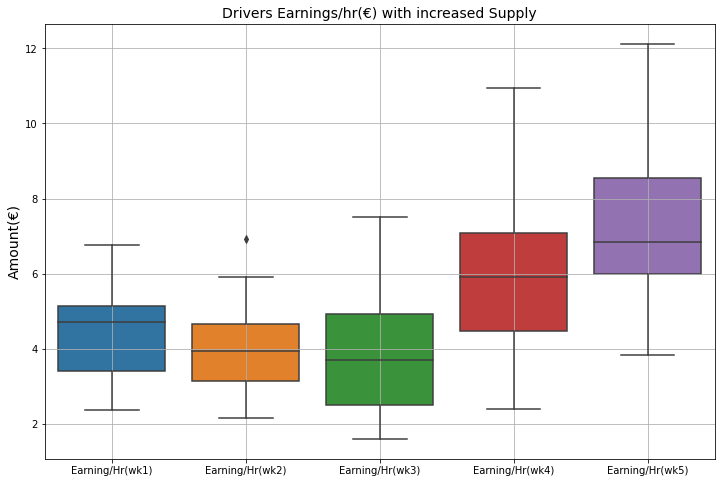

In [ ]:
make_boxplot(earningDF_incrsHrs,"Amount(€)",' ','Drivers Earnings/hr(€) with increased Supply')

In [ ]:
earningDF_incrsHrs.mean()   ##

Earning/Hr(wk1)    4.463841
Earning/Hr(wk2)    3.974704
Earning/Hr(wk3)    3.804493
Earning/Hr(wk4)    5.969903
Earning/Hr(wk5)    7.344969
dtype: float64

- With increase in supply and a constant demand; there is a corresponing reduced price  

# Section D: Conclusion and Recommendation

- The Demand and Supply Dynamics based on the available data have a similar structure.

  -  But they do not match for most of the available hours in the day.

- Based on the available supply hours;

 - The hours of oversupply is between **7pm-9pm**;

 - The hours of undersupply is between **4am-7am**

- The Peak Demand Hours are;

  - **9am**, then **6pm-7pm** 

- With an overall increase in supply Hours, the earning/hour for each driver will slightly reduce

- A slight increase in earning per hour during peak demand period should be made.
 
 - To encourage drivers to be available during peak demand hours

